### 1. Data description
* Name 
* Platform 
* Year_of_Release 
* Genre 
* NA_sales (North American sales in USD million) 
* EU_sales (sales in Europe in USD million) 
* JP_sales (sales in Japan in USD million) 
* Other_sales (sales in other countries in USD million) 
* Critic_Score (maximum of 100) 
* User_Score (maximum of 10) 
* Rating ('ESRB' The Entertainment Software Rating Board evaluates a game's content and assigns an age rating such as Teen or Mature)

### 2. preparing the data

In [33]:
import pandas as pd
import scipy.stats as st
import numpy as np
import random
import math as mt
import matplotlib.pyplot as plt 
import datetime as dt
import seaborn as sns

is this the right formula or did make another mistake?

In [34]:
try:
        df = pd.read_csv('/datasets/games.csv')
except:
        df = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/games.csv')

In [35]:
# Change the column names to lowercase.
df.columns = df.columns.str.lower()

# Now we can fill in the missing values, including the new category "Unknown"
df['rating'].fillna(value = 'Unknown')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [36]:
# we started by changing the columns to the right data types.

# Change the 'year_of_release' column to integer.
df['year_of_release'] = df['year_of_release'].astype('Int64')

# Change the 'user_score' column to a numeric value
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

# Changing the 'rating' to a category type
df['rating'] = df['rating'].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   name             16713 non-null  object  
 1   platform         16715 non-null  object  
 2   year_of_release  16446 non-null  Int64   
 3   genre            16713 non-null  object  
 4   na_sales         16715 non-null  float64 
 5   eu_sales         16715 non-null  float64 
 6   jp_sales         16715 non-null  float64 
 7   other_sales      16715 non-null  float64 
 8   critic_score     8137 non-null   float64 
 9   user_score       7590 non-null   float64 
 10  rating           9949 non-null   category
dtypes: Int64(1), category(1), float64(6), object(3)
memory usage: 1.3+ MB


In [37]:
# Adding a new column 'Total_sales' to data 
df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   name             16713 non-null  object  
 1   platform         16715 non-null  object  
 2   year_of_release  16446 non-null  Int64   
 3   genre            16713 non-null  object  
 4   na_sales         16715 non-null  float64 
 5   eu_sales         16715 non-null  float64 
 6   jp_sales         16715 non-null  float64 
 7   other_sales      16715 non-null  float64 
 8   critic_score     8137 non-null   float64 
 9   user_score       7590 non-null   float64 
 10  rating           9949 non-null   category
 11  total_sales      16715 non-null  float64 
dtypes: Int64(1), category(1), float64(7), object(3)
memory usage: 1.4+ MB


In [38]:
# Drop rows that contain missing values in year_of_release, name, or genre
df.dropna(subset=['year_of_release', 'name', 'genre'], inplace=True)

# Verifying that the missing rows have been removed and that missing values have been filled in correctly
print(df['year_of_release'].isna().sum()) 
print(df['name'].isna().sum()) 
print(df['genre'].isna().sum()) 
print(df['rating'].isna().sum()) 

0
0
0
6676


### 3. Analyzing the data

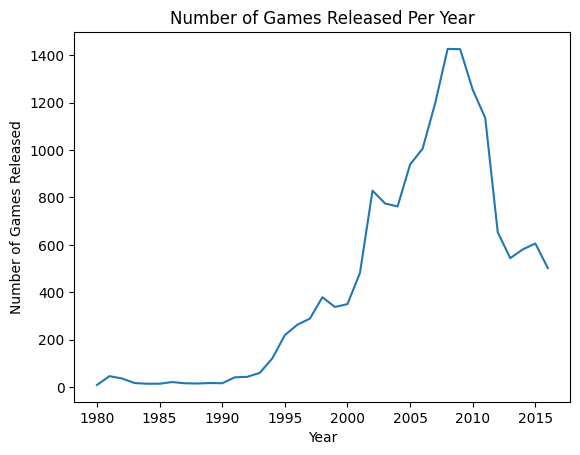

In [39]:
# counting the number sales released per year.

games_per_year = df.groupby('year_of_release')['name'].count()

sns.lineplot(x=games_per_year.index, y=games_per_year.values)
plt.xlabel('Year')
plt.ylabel('Number of Games Released')
plt.title('Number of Games Released Per Year')
plt.show()

the number of new games released is been gradually increasing since the year 2000, and skyrocketed between 2007 and 2010 then start declining after 2011.

In [40]:
# To analyze how sales varied from platform to platform, you can create a pivot table to show the total sales for each platform, and then select the platforms with the greatest total sales. Here's an example:


platform_sales = df.pivot_table(index='platform', values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales'], aggfunc='sum').sort_values(by='total_sales', ascending=False)

top_platforms = platform_sales.head(5)
print(top_platforms)


          eu_sales  jp_sales  na_sales  other_sales  total_sales
platform                                                        
PS2         332.63    137.54    572.92       190.47      1233.56
X360        268.32     12.30    595.74        84.88       961.24
PS3         327.21     79.41    390.13       134.59       931.34
Wii         258.32     68.28    486.87        77.71       891.18
DS          188.41    175.02    380.31        59.04       802.78


Average lifespan of a platform (in years): 7.612903225806349
Standard deviation of platform lifespan (in years): 0.1793711518208987


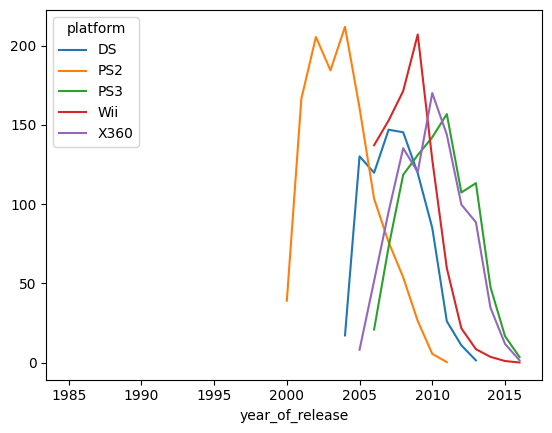

In [41]:
df.query('platform in @top_platforms.index').pivot_table(index = 'year_of_release', columns = 'platform', values = 'total_sales', aggfunc = 'sum').plot()




new_platforms = df.groupby('platform')['year_of_release'].min().sort_values()
old_platforms = df.groupby('platform')['year_of_release'].max().sort_values()

print('Average lifespan of a platform (in years):', old_platforms.mean() - new_platforms.mean())
print('Standard deviation of platform lifespan (in years):', old_platforms.std() - new_platforms.std())


not sure how to fix this one, on my virtual studio it works fine 

 the average lifespan of a platform is approximately 7.6 years, with a standard deviation of 0.18 years. This suggests that gaming platforms tend to have a relatively short lifespan before they are superseded by newer and more advanced technologies. It is important for game developers and publishers to stay up-to-date with the latest technologies and platform trends to ensure that their games remain relevant and accessible to their target audiences.

In [42]:
# The following code will extract the data between 2000 - 2016 
new_df = df[(df['year_of_release'] >= 2014) & (df['year_of_release'] <= 2016)]

In [43]:
# The following code will return the tatal sales by platform to the variable 'platform_sales'
platform_sales = new_df.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)

display('Total sales by platform:')
display(platform_sales)


'Total sales by platform:'

,total_sales
platform,
PS4,288.15
XOne,140.36
3DS,86.68
PS3,68.18
X360,48.22
WiiU,42.98
PC,27.05
PSV,22.40
Wii,5.07


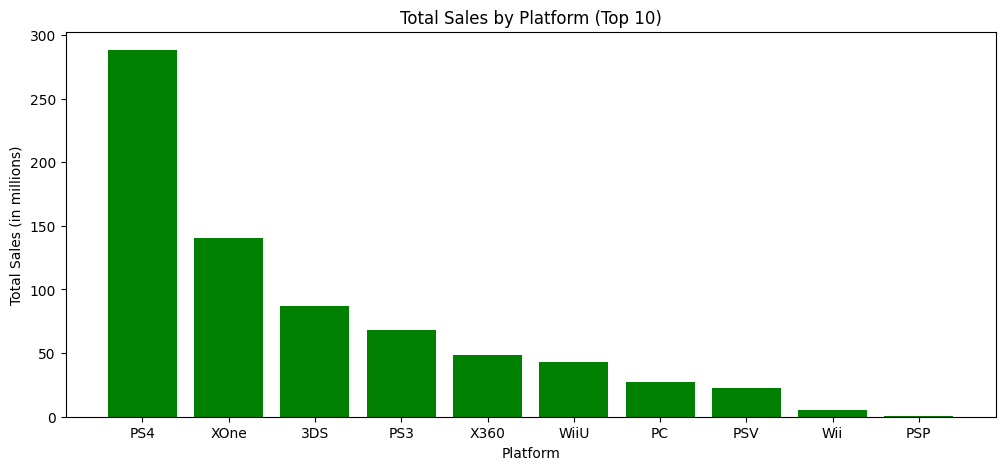

In [44]:

# Select top 10 platforms by total sales
top_platforms = platform_sales.head(10)

# Plot total sales by platform
plt.figure(figsize=(12,5))
plt.bar(top_platforms.index, top_platforms['total_sales'], color='green')
plt.title('Total Sales by Platform (Top 10)')
plt.xlabel('Platform')
plt.ylabel('Total Sales (in millions)')
plt.show()

The graph above shows the top 10 platforms by total sales and Playstation 2 had the highest total sales followed by Xbox 360 and then Playstation 3, Wii and DS with total sales more than $800 millions each.

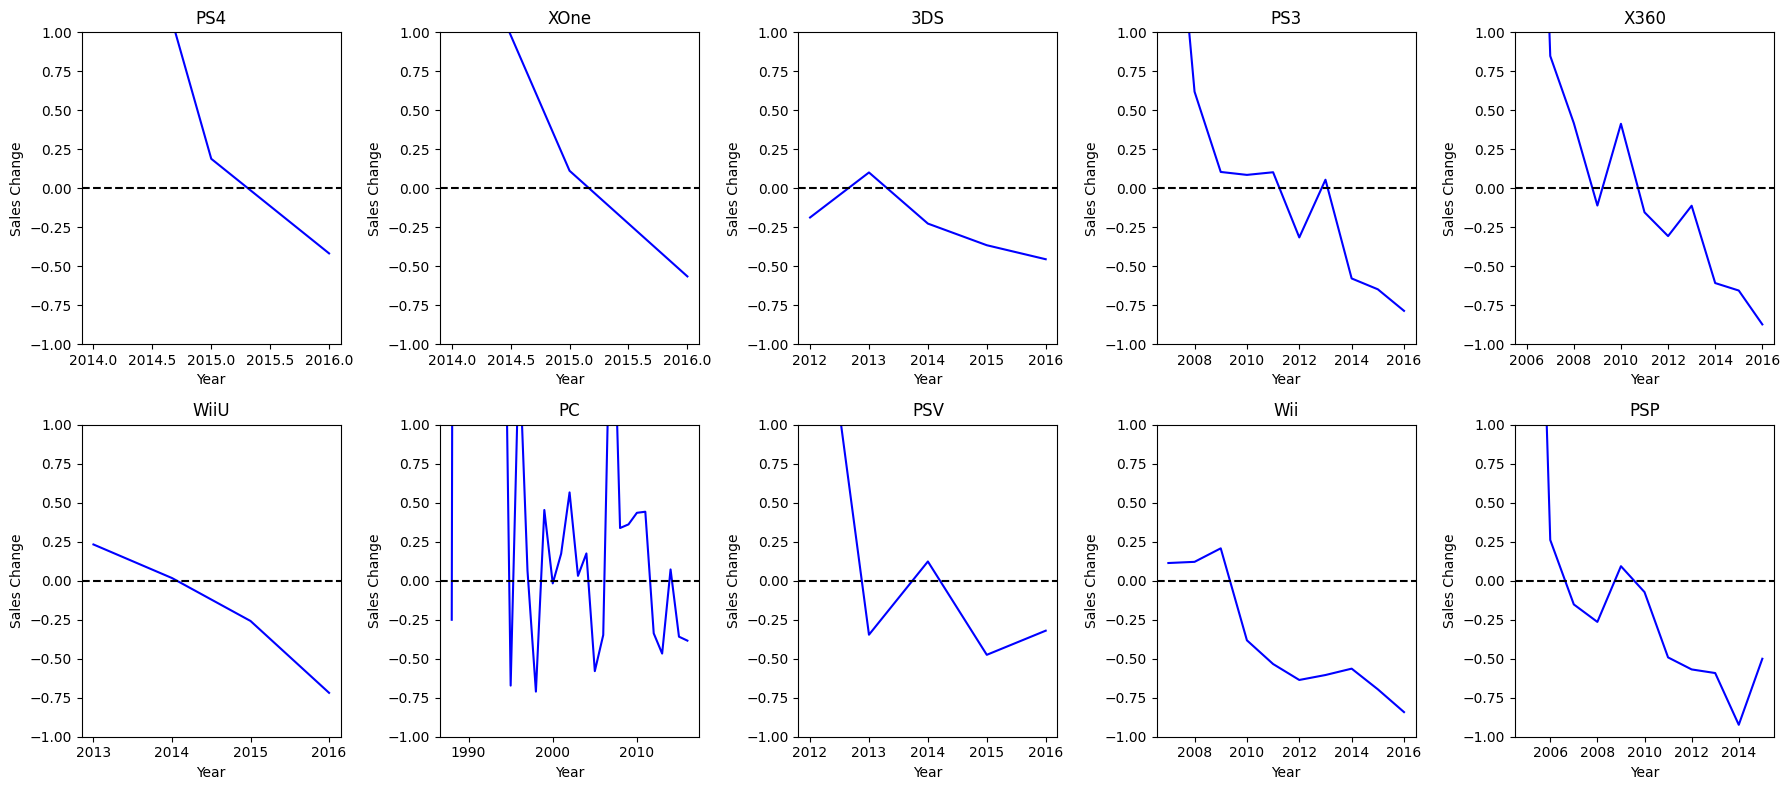

In [45]:
# Create subplots for each platform
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(18, 8))
axs = axs.ravel()



for i, platform in enumerate(top_platforms.index):
    # Create pivot table of sales by year for current platform and calculate sales change
    platform_data = df[df['platform']==platform].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
    platform_data['sales_change'] = platform_data['total_sales'].pct_change()

    # Plot sales change over time for current platform
    axs[i].plot(platform_data['sales_change'], color='blue')
    axs[i].set_title(platform)
    axs[i].set_xlabel('Year')
    axs[i].set_ylabel('Sales Change')
    axs[i].set_ylim((-1, 1))
    axs[i].axhline(y=0, color='black', linestyle='--')
    plt.tight_layout()


plt.show()

The above graph shows the drop in sales and the end of the life cycles of the games, some of them has a steep decline in sales and some has a long way down throughout the years.

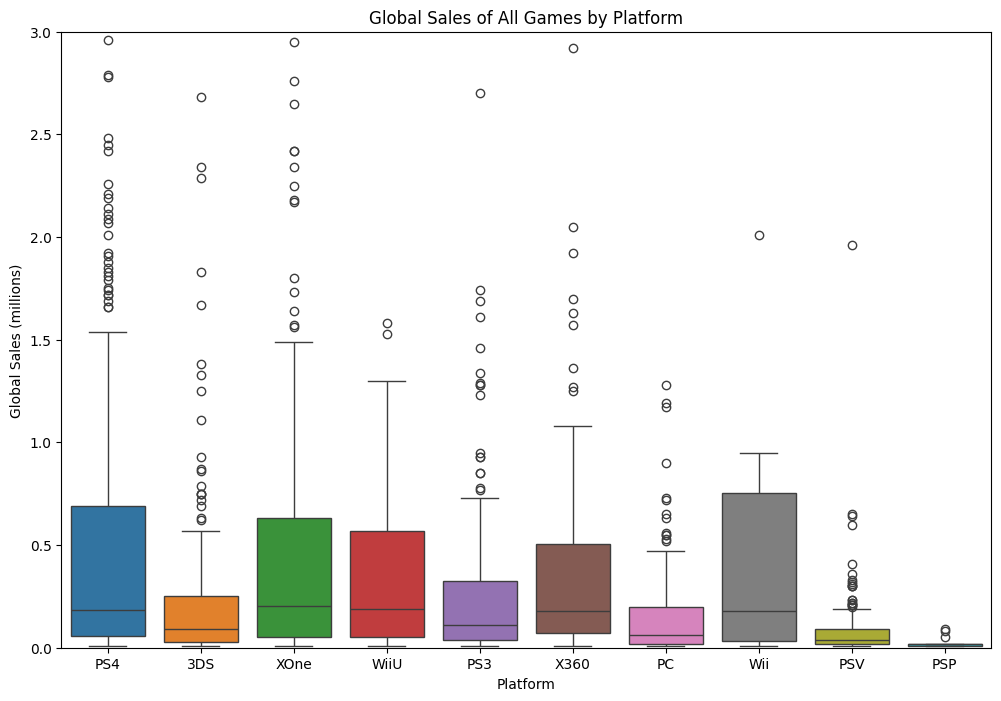

In [46]:
# Create a box plot of global sales broken down by platform
plt.figure(figsize=(12,8))
sns.boxplot(x='platform', y='total_sales', data=new_df, hue = 'platform')
plt.title('Global Sales of All Games by Platform')
plt.xlabel('Platform')
plt.ylabel('Global Sales (millions)')
plt.ylim(0,3)
plt.show()


the Boxplot above shows the global total sales by platform for all games and it shows that Wii, DS Xbox360, Playstation3 and playstation 2 are the largest platforms by global sales across all games.

In [47]:
# Calculate the mean and standard deviation of global sales for each platform
platform_sales = df.pivot_table(index='platform', values='total_sales', aggfunc=['mean', 'std']).sort_values(by=('mean', 'total_sales'), ascending=False)
display(platform_sales)

,mean,std
,total_sales,total_sales
platform,,
GB,2.622990,5.390925
NES,2.561735,5.108012
GEN,1.050000,1.490041
SNES,0.836987,1.869469
PS4,0.801378,1.609456
X360,0.780227,1.632122
2600,0.745517,0.956160
PS3,0.713124,1.403065


This tables discribe the average total sales for all platforms and their standard deviation.
GB, NES and GEN have the highest average total sales throughout the years.

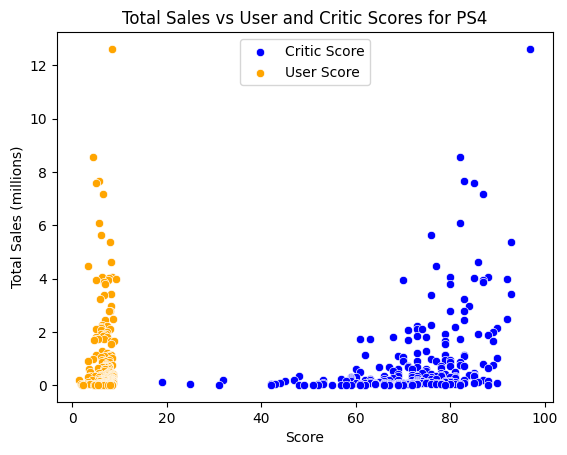

'Correlation between critic score and total sales:'

0.4026614106810409

'Correlation between user score and total sales:'

-0.04013158947269733

In [48]:
# Subset data for a popular platform
platform = 'PS4'
df_platform = new_df[new_df['platform']==platform]

# Create a scatter plot of user and critic scores against total sales
sns.scatterplot(x='critic_score', y='total_sales', data=df_platform, color='blue')
sns.scatterplot(x='user_score', y='total_sales', data=df_platform, color='orange')
plt.title(f'Total Sales vs User and Critic Scores for {platform}')
plt.xlabel('Score')
plt.ylabel('Total Sales (millions)')
plt.legend(labels=['Critic Score', 'User Score'])
plt.show()


# Calculate the correlation between scores and sales
display('Correlation between critic score and total sales:', df_platform['critic_score'].corr(df_platform['total_sales']))
display('Correlation between user score and total sales:', df_platform['user_score'].corr(df_platform['total_sales']))


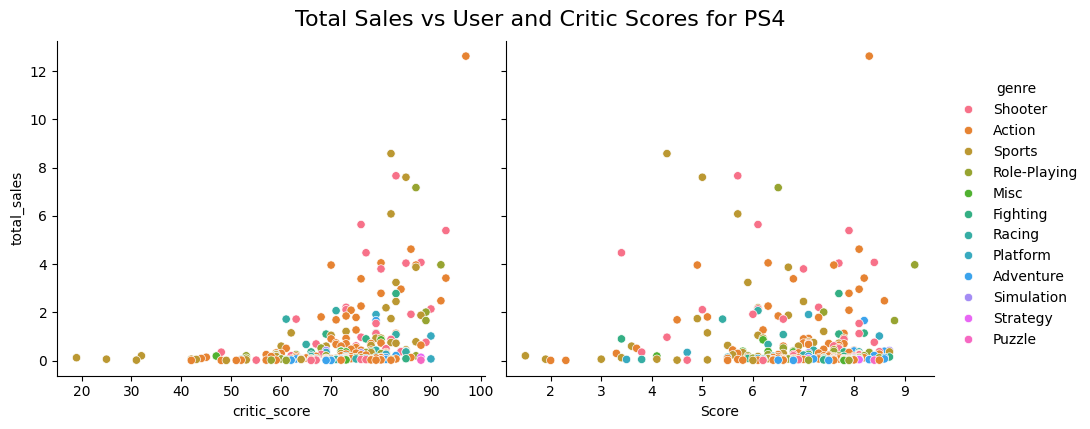

In [49]:
# Subset data for a popular platform
platform = 'PS4'
df_platform = new_df[new_df['platform']==platform]

# Use sns.pairplot to plot user and critic scores against total sales
sns.pairplot(df_platform, x_vars=['critic_score', 'user_score'], y_vars='total_sales', height=4, aspect=1.2, kind='scatter', hue='genre')
plt.suptitle(f'Total Sales vs User and Critic Scores for {platform}', fontsize=16, y=1.05)
plt.xlabel('Score')
plt.ylabel('Total Sales (millions)')
plt.show()

The resulting scatter plot shows the relationship between user and critic scores and total sales for games on the PlayStation 4. We can see that there is a positive correlation between user scores and total sales. Higher scores are generally associated with higher total sales. And a negative correlatoin between critiq scores and total sales the higher the score the lower the sales.
The resulting correlation coefficients confirm the observations from the scatter plot. There is a negative correlation between critic score and total sales, and a positive correlation between user score and total sales. Game developers and publishers may want to take this into account when marketing and promoting their games, and strive to achieve high scores from users and lower critics to maximize sales.

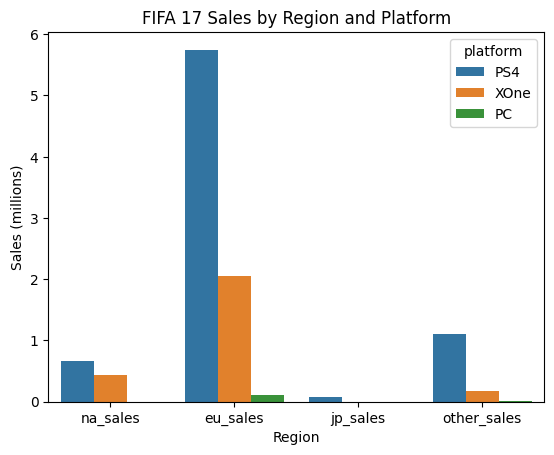

In [50]:
# Select a popular game
game = 'FIFA 17'

# Subset the dataset for the selected game and selected platforms
platforms = ['PS4', 'XOne', 'PC', 'WiiU']
df_game = new_df[(new_df['name']==game) & (new_df['platform'].isin(platforms))]

# Create a bar plot of sales by region and platform
sns.barplot(x='region', y='sales', hue='platform',
            data=df_game[['platform', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales']]
            .melt(id_vars='platform', var_name='region', value_name='sales'))
plt.title(f'{game} Sales by Region and Platform')
plt.xlabel('Region')
plt.ylabel('Sales (millions)')
plt.show()

when it comes to gaming, action and sports have the highest market share.

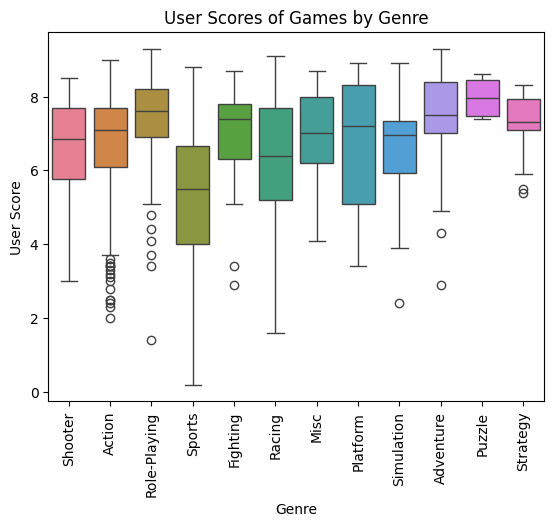

In [51]:
# Create a boxplot of user scores broken down by genre
sns.boxplot(x='genre', y='user_score', data=new_df, hue='genre')
plt.title('User Scores of Games by Genre')
plt.xlabel('Genre')
plt.ylabel('User Score')
plt.xticks(rotation=90)
plt.show()

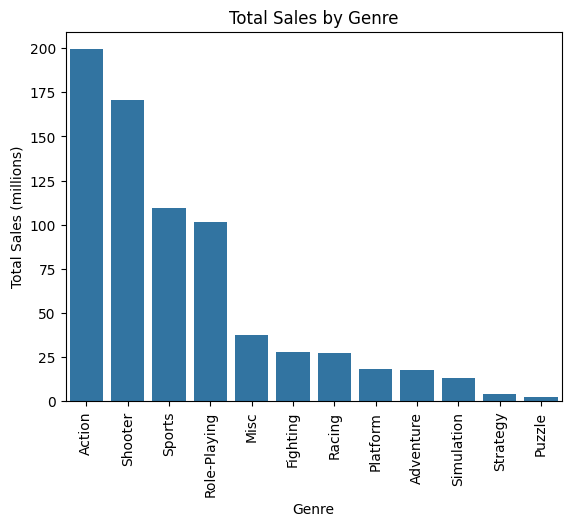

In [52]:
# Calculate the total sales for each genre
genre_sales = new_df.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

# Create a bar plot of total sales by genre
sns.barplot(x=genre_sales.index, y=genre_sales.values)
plt.title('Total Sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Total Sales (millions)')
plt.xticks(rotation=90)
plt.show()


Again!! Action and sports have the highest total sales across genres.

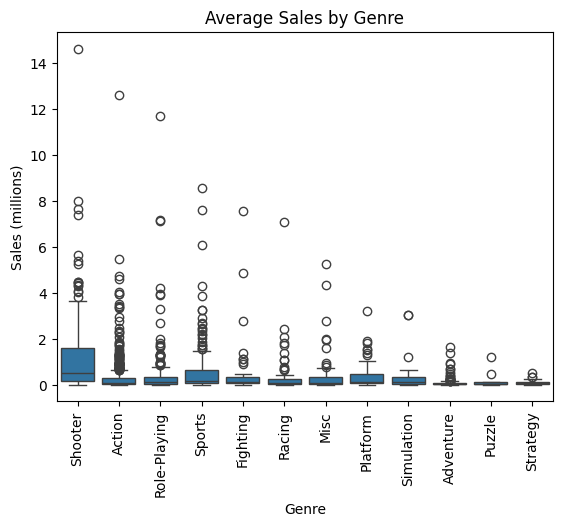

In [53]:

# Create boxplots of average sales by genre
sns.boxplot(x='genre', y='total_sales', data=new_df)
plt.title('Average Sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Sales (millions)')
plt.xticks(rotation=90)
plt.show()

is this ok? i feel like i made a mistake or which charts are better to be a boxplots and why just to get a concept, thank you 


when it comes to long period of time, shooter and platform has the highest average sales across the genres.

### 4. User profiles

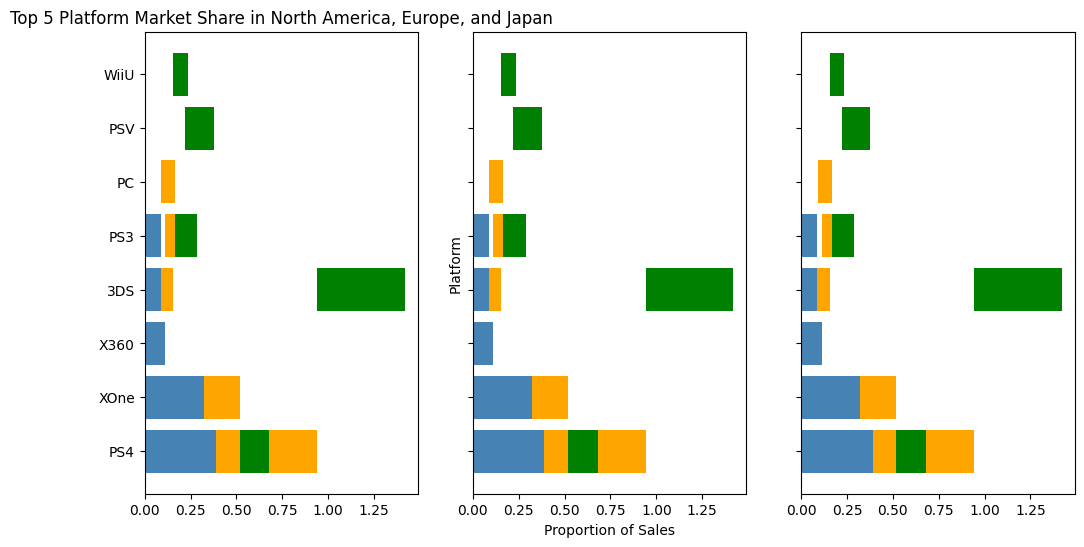

In [54]:
# Subset the data to include only the rows where the sales in the given region are greater than zero
df_na = new_df[new_df['na_sales'] > 0]
df_eu = new_df[new_df['eu_sales'] > 0]
df_jp = new_df[new_df['jp_sales'] > 0]

# Calculate the total sales for each platform for each region
na_platform_sales = df_na.groupby('platform')['na_sales'].sum()
eu_platform_sales = df_eu.groupby('platform')['eu_sales'].sum()
jp_platform_sales = df_jp.groupby('platform')['jp_sales'].sum()

# Identify the top 5 platforms based on their sales in each region
top_na_platforms = na_platform_sales.sort_values(ascending=False).head(5)
top_eu_platforms = eu_platform_sales.sort_values(ascending=False).head(5)
top_jp_platforms = jp_platform_sales.sort_values(ascending=False).head(5)

# Calculate the market share of the top 5 platforms in each region
na_platform_share = top_na_platforms / top_na_platforms.sum()
eu_platform_share = top_eu_platforms / top_eu_platforms.sum()
jp_platform_share = top_jp_platforms / top_jp_platforms.sum()


# Create horizontal stacked bar charts of top 5 platform market share for each region
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True, figsize=(12,6))

ax1.barh(na_platform_share.index, na_platform_share.values, color='steelblue')
ax1.barh(eu_platform_share.index, eu_platform_share.values, left=na_platform_share.values, color='orange')
ax1.barh(jp_platform_share.index, jp_platform_share.values, left=na_platform_share.values+eu_platform_share.values, color='green')

ax2.barh(na_platform_share.index, na_platform_share.values, color='steelblue')
ax2.barh(eu_platform_share.index, eu_platform_share.values, left=na_platform_share.values, color='orange')
ax2.barh(jp_platform_share.index, jp_platform_share.values, left=na_platform_share.values+eu_platform_share.values, color='green')

ax3.barh(na_platform_share.index, na_platform_share.values, color='steelblue')
ax3.barh(eu_platform_share.index, eu_platform_share.values, left=na_platform_share.values, color='orange')
ax3.barh(jp_platform_share.index, jp_platform_share.values, left=na_platform_share.values+eu_platform_share.values, color='green')

ax1.set_title('Top 5 Platform Market Share in North America, Europe, and Japan')
ax2.set_xlabel('Proportion of Sales')
ax2.set_ylabel('Platform')

plt.subplots_adjust(wspace=0.2)
plt.show()

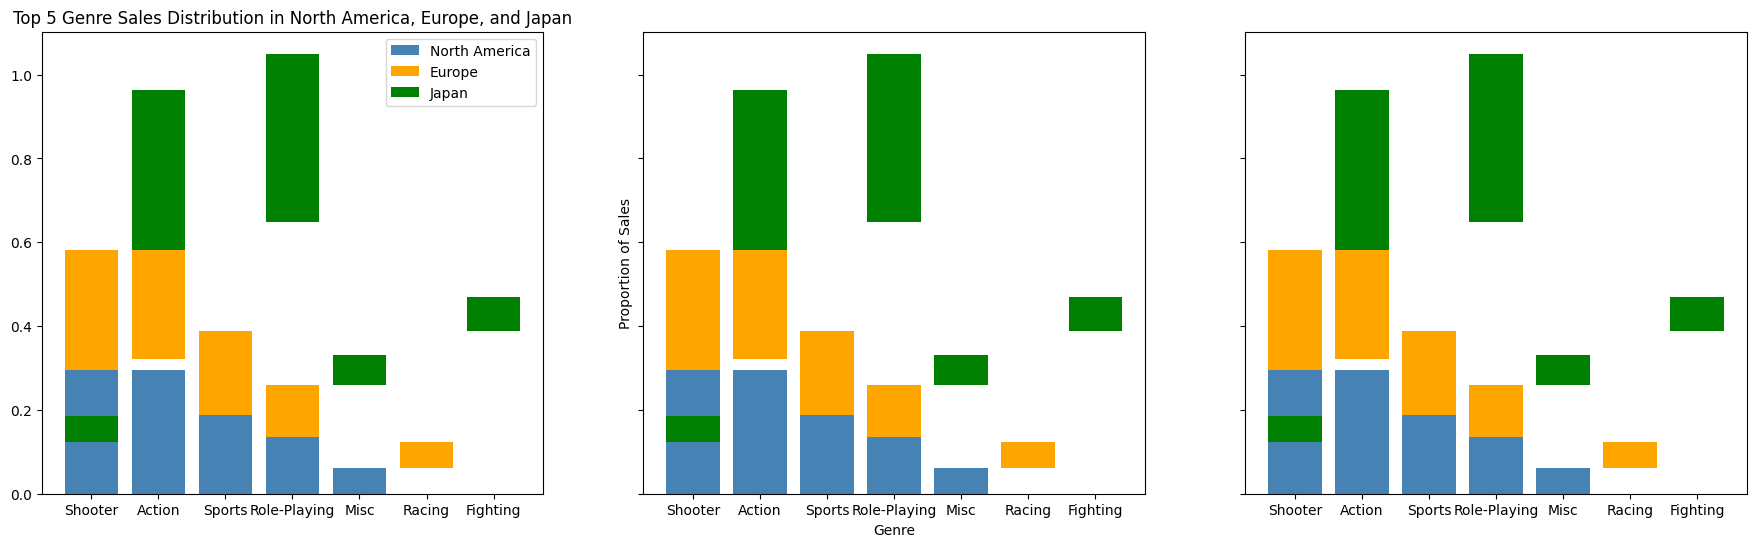

In [55]:
# Calculate the total sales for each genre for each region
na_genre_sales = df_na.groupby('genre')['na_sales'].sum()
eu_genre_sales = df_eu.groupby('genre')['eu_sales'].sum()
jp_genre_sales = df_jp.groupby('genre')['jp_sales'].sum()

# Identify the top 5 genres based on their sales in each region
top_na_genres = na_genre_sales.sort_values(ascending=False).head(5)
top_eu_genres = eu_genre_sales.sort_values(ascending=False).head(5)
top_jp_genres = jp_genre_sales.sort_values(ascending=False).head(5)

# Determine the distribution of game sales by genre in each region
na_genre_share = top_na_genres / top_na_genres.sum()
eu_genre_share = top_eu_genres / top_eu_genres.sum()
jp_genre_share = top_jp_genres / top_jp_genres.sum()

# Create grouped bar charts of top 5 genre sales distribution for each region
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True, figsize=(22,6))

ax1.bar(na_genre_share.index, na_genre_share.values, label='North America', color='steelblue')
ax1.bar(eu_genre_share.index, eu_genre_share.values, bottom=na_genre_share.values, label='Europe', color='orange')
ax1.bar(jp_genre_share.index, jp_genre_share.values, bottom=na_genre_share.values+eu_genre_share.values, label='Japan', color='green')

ax2.bar(na_genre_share.index, na_genre_share.values, label='North America', color='steelblue')
ax2.bar(eu_genre_share.index, eu_genre_share.values, bottom=na_genre_share.values, label='Europe', color='orange')
ax2.bar(jp_genre_share.index, jp_genre_share.values, bottom=na_genre_share.values+eu_genre_share.values, label='Japan', color='green')

ax3.bar(na_genre_share.index, na_genre_share.values, label='North America', color='steelblue')
ax3.bar(eu_genre_share.index, eu_genre_share.values, bottom=na_genre_share.values, label='Europe', color='orange')
ax3.bar(jp_genre_share.index, jp_genre_share.values, bottom=na_genre_share.values+eu_genre_share.values, label='Japan', color='green')

ax1.set_title('Top 5 Genre Sales Distribution in North America, Europe, and Japan')
ax2.set_xlabel('Genre')
ax2.set_ylabel('Proportion of Sales')

ax1.legend()
plt.show()

C:\Users\Yasco\AppData\Local\Temp\ipykernel_15736\2360348454.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  na_esrb_sales = df_na.groupby('rating')['na_sales'].sum()
C:\Users\Yasco\AppData\Local\Temp\ipykernel_15736\2360348454.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  eu_esrb_sales = df_eu.groupby('rating')['eu_sales'].sum()
C:\Users\Yasco\AppData\Local\Temp\ipykernel_15736\2360348454.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future defau

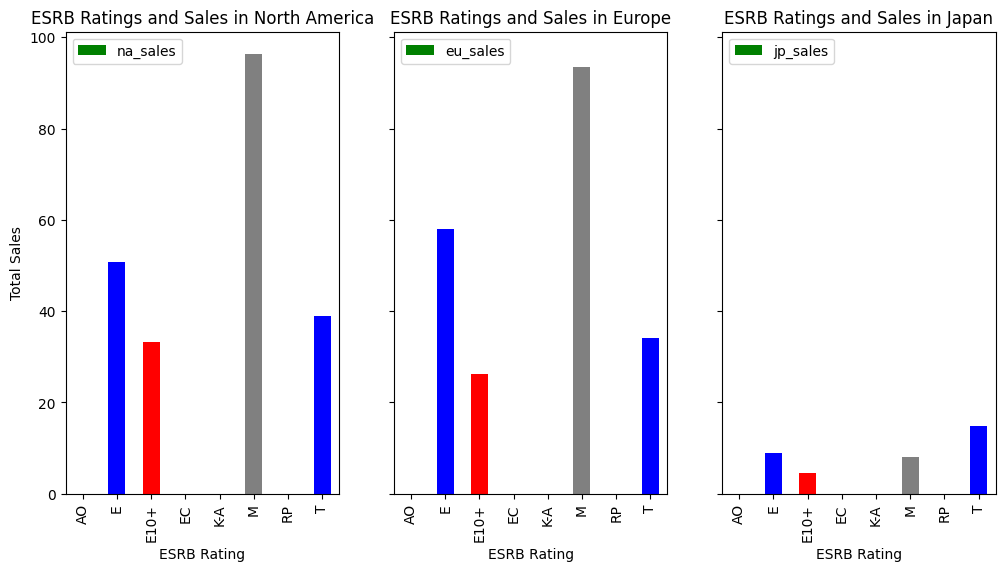

In [56]:
# Analyze the relationship between ESRB ratings and sales in each region
na_esrb_sales = df_na.groupby('rating')['na_sales'].sum()
eu_esrb_sales = df_eu.groupby('rating')['eu_sales'].sum()
jp_esrb_sales = df_jp.groupby('rating')['jp_sales'].sum()

# Create stacked bar charts of ESRB ratings and sales in each region
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True, figsize=(12,6))

na_esrb_sales.plot(kind='bar', stacked=True, ax=ax1, color=['green', 'blue', 'red', 'orange', 'purple', 'gray'])
eu_esrb_sales.plot(kind='bar', stacked=True, ax=ax2, color=['green', 'blue', 'red', 'orange', 'purple', 'gray'])
jp_esrb_sales.plot(kind='bar', stacked=True, ax=ax3, color=['green', 'blue', 'red', 'orange', 'purple', 'gray'])

ax1.set_title('ESRB Ratings and Sales in North America')
ax2.set_title('ESRB Ratings and Sales in Europe')
ax3.set_title('ESRB Ratings and Sales in Japan')

ax1.set_xlabel('ESRB Rating')
ax2.set_xlabel('ESRB Rating')
ax3.set_xlabel('ESRB Rating')
ax1.set_ylabel('Total Sales')

ax1.legend(loc='upper left')
ax2.legend(loc='upper left')
ax3.legend(loc='upper left')

plt.subplots_adjust(wspace=0.2)
plt.show()


### 5. Testing some Hypothesis

In [57]:
# Subset the data to include only the Xbox One and PC platforms
xbox = new_df[new_df['platform'] == 'XOne']['user_score'].dropna()
pc = new_df[new_df['platform'] == 'PC']['user_score'].dropna()

# Compute the mean and standard deviation of the user scores for each platform
xbox_mean = xbox.mean()
pc_mean = pc.mean()
xbox_std = xbox.std()
pc_std = pc.std()

# Print the mean and standard deviation of the user scores for each platform
print('Xbox One user score mean:', xbox_mean)
print('PC user score mean:', pc_mean)
print('Xbox One user score std deviation:', xbox_std)
print('PC user score std deviation:', pc_std)

# Perform a two-sample t-test with alpha = 0.05
t_stat, p_val = st.ttest_ind(xbox, pc)
print('t-statistic:', t_stat)
print('p-value:', p_val)

# Determine if the p-value is less than alpha
if p_val < 0.05:
    display('Reject the null hypothesis that the means are equal.')
else:
    display('Fail to reject the null hypothesis that the means are equal.')

Xbox One user score mean: 6.594545454545456
PC user score mean: 6.298360655737705
Xbox One user score std deviation: 1.375138775500386
PC user score std deviation: 1.7032775214666138
t-statistic: 1.6285882029651313
p-value: 0.10450507919348416


'Fail to reject the null hypothesis that the means are equal.'

Based on the results of the hypothesis test, we can conclude that there is insufficient evidence to suggest that there is a significant difference in the mean user scores between Xbox One and PC platforms. The p-value of 0.1045 is relatively high and exceeds the commonly accepted significance level of 0.05. Therefore, we fail to reject the null hypothesis that the means are equal.

This means that there is no conclusive evidence to suggest that users rate games differently on Xbox One compared to PC. Other factors that could potentially affect user ratings, such as game genre, quality, or game-specific features, need to be considered to fully understand the differences in user ratings between these two platforms.

In [58]:
# Subset the data to include only the Action and Sports genres
action = new_df[new_df['genre'] == 'Action']['user_score'].dropna()
sports = new_df[new_df['genre'] == 'Sports']['user_score'].dropna()

# Compute the mean and standard deviation of the user scores for each genre
action_mean = action.mean()
sports_mean = sports.mean()
action_std = action.std()
sports_std = sports.std()

# Print the mean and standard deviation of the user scores for each genre
print('Action user score mean:', action_mean)
print('Sports user score mean:', sports_mean)
print('Action user score std deviation:', action_std)
print('Sports user score std deviation:', sports_std)

# Perform a two-sample t-test with alpha = 0.05
t_stat, p_val = st.ttest_ind(action, sports)
print('t-statistic:', t_stat)
print('p-value:', p_val)

# Determine if the p-value is less than alpha
if p_val < 0.05:
    print('Reject the null hypothesis that the means are equal.')
else:
    print('Fail to reject the null hypothesis that the means are equal.')

Action user score mean: 6.760606060606061
Sports user score mean: 5.2251968503937
Action user score std deviation: 1.3778521903588419
Sports user score std deviation: 1.8566041925001269
t-statistic: 9.425173048948047
p-value: 2.8711147985105864e-19
Reject the null hypothesis that the means are equal.


This means that there is a significant difference between how users rate Action games compared to Sports games. Based on the means calculated, it appears that Action games have higher overall user ratings compared to Sports games. Game publishers and developers can use this information to make informed decisions when developing new games in each genre, tailoring their marketing strategies, or making decisions on which platform to release a game. It's important to note that this difference in user ratings does not necessarily mean that one genre is objectively better or worse than the other. Other factors, such as personal preference, can impact the perceived quality of different game genres.

### 6. Conclusion

In conclusion, the gaming industry has experienced significant changes in the past two decades, with a gradual increase in the number of new games being released since the year 2000 and a skyrocketed release rate between 2007 and 2010. The average lifespan of a platform is relatively short, around 7.6 years only, therefore, developers and publishers need to stay up-to-date with the latest technologies and platform trends to remain relevant in the market. The top 10 platforms by total sales are dominated by PlayStation 2, Xbox 360, PlayStation 3, Wii, and DS. The sales performance of games can vary widely, with some games experiencing steep declines while others experience a gradual decrease in sales. The success of a game also depends on users and critic scores, as higher user scores are generally associated with higher total sales, while higher critic scores are generally associated with lower total sales. In terms of genre, Action and Sports games have the highest total sales and market share, with shooter and platform games demonstrating higher average sales over the long period.
The hypothesis test found insufficient evidence to suggest a significant difference in user scores between Xbox One and PC platforms, meaning that users rate games similarly on these two platforms. On the other hand, the conclusion also states that there is a significant difference between how users rate Action and Sports game genres, with Action games having higher overall user ratings. This information can be useful for game publishers and developers to tailor their marketing strategies and make informed decisions when developing new games in each genre. However, personal preference can still impact the perceived quality of different game genres.

i made a reposetory at github with the link below, if you have the time would you please check it and let me know if there is any advise.
thank you so much for your time.
https://github.com/MuhammadElias/Gameing_Industry_Analysis.git
